<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/061423_Adjacency_List_Larger_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Adjacency List Construction from Edges and Examples

Import the libraries needed to construct the network and to plot the graph.

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In the following function **build_adjacency_list**, each node is followed by its corresponding neighbors. The index list shows the starting position of each node's neighbors in the neighbor list and the number of neighbors for each node. The function **print_adjacency_list** calls the prior function and prints the results.

In [9]:
def build_adjacency_list(edges):
    G = nx.Graph()
    G.add_edges_from(edges)

    adjacency_list = {}
    index_list = {}
    neighbor_list = []
    neighbor_count = {}  # New dictionary to store the number of neighbors for each node

    index = 0
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        adjacency_list[node] = neighbors
        neighbor_list.extend(neighbors)

        neighbor_count[node] = len(neighbors)  # Store the number of neighbors for the node

        # Create index list with the node and its starting position
        index_list[node] = index
        index += len(neighbors)

    return adjacency_list, index_list, neighbor_list, neighbor_count

def print_adjacency_list(edges):
    adj_list, index_list, neighbor_list, neighbor_count = build_adjacency_list(edges)

    print("Adjacency List:")
    for node, neighbors in adj_list.items():
        print(f"Node {node}: {neighbors}")

    print("\nNeighbor List:")
    print(neighbor_list)

    print("\nIndex List:")
    for node, start_index in index_list.items():
        print(f"{node}: {start_index}")

    print("\nNeighbor Count:")
    for node, count in neighbor_count.items():
        print(f"{node}: {count}")


In [10]:
#Test 1:
edges = [(1, 2), (1, 3), (1, 4), (2, 3), (3, 5), (3, 4)]

print_adjacency_list(edges)

Adjacency List:
Node 1: [2, 3, 4]
Node 2: [1, 3]
Node 3: [1, 2, 5, 4]
Node 4: [1, 3]
Node 5: [3]

Neighbor List:
[2, 3, 4, 1, 3, 1, 2, 5, 4, 1, 3, 3]

Index List:
1: 0
2: 3
3: 5
4: 9
5: 11

Neighbor Count:
1: 3
2: 2
3: 4
4: 2
5: 1


In [18]:
## Build my own configuration model
import numpy as np
import math as math

def generate_degree_sequence(n, gamma, kmin):
    """
    Generates a degree sequence of length n following a power law distribution.

    Parameters:
        n (int): Length of the degree sequence.
        gamma (float): Exponent of the power law distribution (gamma > 1).
        kmin (int): Minimum degree value in the sequence.

    Returns:
        list: Degree sequence following a power law distribution.
    """

    # Generate a random sample from the power law distribution
    # by mapping the uniform distribution to power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values (kmin, kmax)
    kmax = int(math.sqrt(n))
    degrees = [int(degree) for degree in degrees if degree >= kmin and degree <= kmax]

    # Truncate or pad the sequence to match the desired length
    degrees = degrees[:n] if len(degrees) >= n else degrees + [kmin] * (n - len(degrees))

    return degrees

In [19]:
import random
import networkx as nx

def generate_configuration_model(degree_sequence):
    """
    Generates a random graph based on the input of a degree sequence

    It checks if the sum of degrees is odd.

    There should be no double connections and no self connections.

    """
    # Create an empty graph
    G = nx.Graph()

    # Calculate the sum of degrees
    degree_sum = sum(degree_sequence)

    # Print error message if the sum is odd
    if degree_sum % 2 != 0:
        raise ValueError("Degree sum is odd")


    # Create a list of labels based on the degree sequence
    labels = []
    for node, degree in enumerate(degree_sequence):
        labels.extend([node] * degree)
    #print(labels)

    # Randomly shuffle the labels
    random.shuffle(labels)

    # Pair the lables and add edges to the graph
    # check to ensure no link to self
    # do not add edge if it's already in graph

    while len(labels) >= 2:  # At least two labels are required to form an edge
        node1 = labels[-1]
        node2 = labels[-2]
        if node1 != node2 and not G.has_edge(node1, node2):
            G.add_edge(node1, node2)
            labels.pop()
            labels.pop()
        else:
            random.shuffle(labels)

    return G

Degree sequence: [(83, 5), (239, 3), (371, 3), (22, 5), (306, 3), (256, 3), (164, 11), (41, 3), (72, 21), (267, 3), (124, 19), (348, 3), (30, 14), (66, 11), (67, 10), (304, 3), (142, 4), (265, 3), (88, 19), (157, 4), (76, 5), (161, 20), (433, 3), (430, 3), (135, 14), (9, 10), (34, 9), (210, 3), (195, 4), (29, 11), (398, 3), (45, 14), (133, 3), (61, 5), (180, 5), (376, 3), (185, 9), (317, 3), (202, 3), (284, 3), (43, 3), (281, 3), (55, 13), (85, 4), (166, 3), (99, 19), (292, 3), (246, 3), (235, 3), (468, 3), (26, 5), (42, 9), (1, 10), (307, 3), (101, 6), (75, 5), (96, 3), (220, 3), (474, 3), (163, 3), (31, 3), (134, 7), (484, 3), (132, 3), (94, 3), (156, 16), (23, 13), (207, 3), (19, 5), (285, 3), (289, 3), (274, 3), (418, 3), (97, 6), (272, 3), (426, 3), (33, 3), (105, 7), (419, 3), (25, 20), (141, 8), (98, 3), (86, 12), (56, 13), (189, 4), (40, 4), (229, 3), (295, 3), (173, 4), (473, 3), (336, 3), (392, 3), (113, 5), (32, 6), (65, 6), (147, 12), (262, 3), (247, 3), (92, 8), (273, 3), 

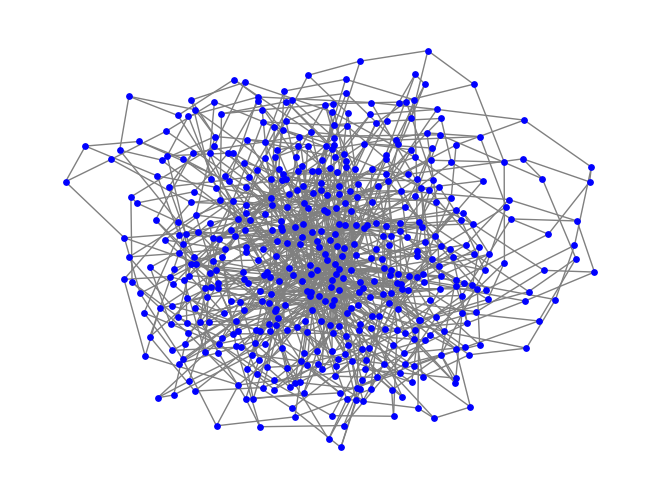

In [20]:
degree_sequence2 = generate_degree_sequence(500, 2.3, 3)

G2 = generate_configuration_model(degree_sequence2)

# Print the resulting graph's degree sequence
print("Degree sequence:", list(G2.degree()))

# draw the graph
nx.draw(G2, node_color="blue", node_size=15, edge_color="grey", width=1, with_labels=False)
plt.show()

In [21]:
#Test 2:
edges2 = G2.edges()

print_adjacency_list(edges2)

Adjacency List:
Node 83: [239, 443, 300, 200, 148]
Node 239: [83, 87, 145]
Node 443: [83, 368, 130]
Node 300: [83, 101, 31]
Node 200: [83, 78, 59]
Node 148: [83, 161, 167, 228, 416, 451]
Node 87: [239, 147, 482, 44]
Node 145: [239, 227, 242]
Node 371: [22, 185, 494]
Node 22: [371, 66, 341, 294, 1]
Node 185: [371, 305, 404, 496, 424, 499, 353, 332, 156]
Node 494: [371, 347, 423]
Node 66: [22, 30, 244, 156, 355, 129, 88, 174, 135, 212, 476]
Node 341: [22, 233, 14]
Node 294: [22, 329, 415]
Node 1: [22, 99, 31, 70, 141, 302, 230, 18, 118, 329]
Node 306: [256, 88, 272]
Node 256: [306, 287, 59]
Node 88: [306, 66, 157, 215, 126, 32, 355, 155, 346, 333, 498, 238, 68, 58, 228, 369, 305, 99, 156]
Node 272: [306, 426, 252]
Node 287: [256, 99, 268]
Node 59: [256, 72, 124, 30, 34, 45, 200, 20, 125, 280, 302, 111, 5, 184, 485, 252, 116, 119, 74, 456, 482]
Node 164: [41, 42, 62, 327, 46, 5, 414, 135, 134, 35, 147]
Node 41: [164, 269, 232]
Node 42: [164, 76, 398, 78, 383, 313, 25, 375, 461]
Node 62: [

Degree sequence: [(2387, 3), (1543, 3), (409, 12), (1900, 3), (541, 10), (420, 12), (334, 3), (594, 7), (2562, 3), (1284, 3), (408, 3), (494, 3), (709, 5), (1493, 3), (798, 13), (144, 3), (2285, 3), (288, 4), (1045, 20), (1039, 7), (197, 9), (2765, 3), (98, 3), (18, 6), (186, 11), (2480, 3), (1492, 3), (807, 3), (2871, 3), (787, 4), (2215, 3), (809, 3), (36, 5), (2570, 3), (2628, 3), (2068, 3), (1632, 3), (2998, 3), (329, 44), (685, 7), (834, 33), (2058, 3), (2213, 3), (189, 28), (2495, 3), (569, 4), (133, 3), (2640, 3), (252, 5), (2254, 3), (1763, 3), (1058, 3), (118, 4), (2366, 3), (430, 28), (1015, 5), (400, 24), (859, 52), (570, 11), (2798, 3), (1588, 3), (1, 4), (2187, 3), (289, 45), (48, 3), (1363, 3), (175, 4), (1389, 3), (903, 18), (154, 26), (917, 25), (1747, 3), (2468, 3), (1458, 3), (1709, 3), (947, 3), (1956, 3), (2952, 3), (1054, 15), (424, 44), (389, 3), (1520, 3), (611, 3), (1209, 3), (669, 19), (2124, 3), (734, 3), (1495, 3), (380, 23), (958, 15), (881, 3), (526, 7), (2

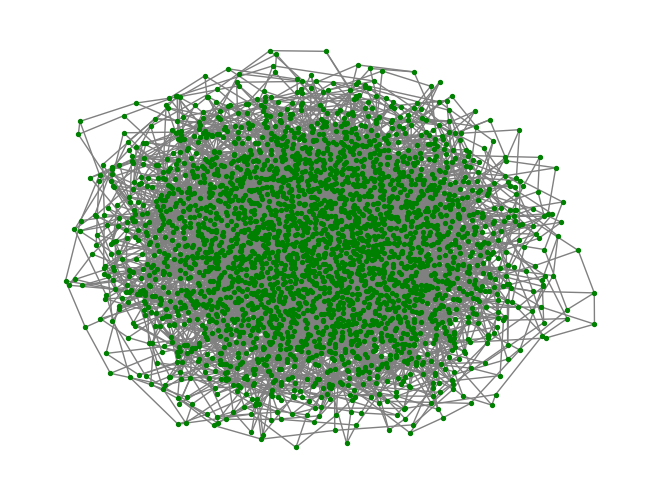

In [23]:
degree_sequence3 = generate_degree_sequence(3000, 2.5, 3)

G3 = generate_configuration_model(degree_sequence3)

# Print the resulting graph's degree sequence
print("Degree sequence:", list(G3.degree()))

# draw the graph
nx.draw(G3, node_color="green", node_size=8, edge_color="grey", width=1, with_labels=False)
plt.show()

In [24]:
#Test 3:
edges3 = G3.edges()

print_adjacency_list(edges3)

Streaming output truncated to the last 5000 lines.
2363: 5101
328: 5104
1395: 5113
2598: 5116
2639: 5119
985: 5122
1972: 5126
1681: 5129
790: 5132
385: 5135
751: 5139
59: 5145
1641: 5148
1607: 5151
1516: 5154
1555: 5157
954: 5160
341: 5165
1805: 5170
1838: 5173
641: 5176
730: 5179
2870: 5182
1125: 5185
2748: 5188
244: 5191
2614: 5195
2949: 5198
521: 5201
2260: 5208
511: 5211
421: 5215
2460: 5223
2030: 5226
337: 5229
234: 5233
2243: 5236
588: 5239
1003: 5243
1633: 5246
1177: 5249
1757: 5252
517: 5255
1138: 5259
1005: 5262
776: 5267
2668: 5273
85: 5276
1880: 5280
2458: 5283
966: 5286
2661: 5289
1163: 5292
1098: 5295
2800: 5298
212: 5301
602: 5305
296: 5308
1748: 5311
700: 5314
1242: 5323
1716: 5326
918: 5329
2183: 5334
367: 5337
2937: 5341
1121: 5344
2237: 5347
1533: 5350
1333: 5353
436: 5356
1133: 5362
2712: 5365
2291: 5368
2019: 5371
1664: 5374
2112: 5377
2760: 5380
183: 5383
150: 5390
1388: 5393
1798: 5396
1377: 5399
1518: 5402
49: 5405
2484: 5410
654: 5413
348: 5416
1530: 5420
1974: 

This following code defines a **draw_graph** function that takes the list of edges as input. It creates a NetworkX graph G and adds the edges to it.

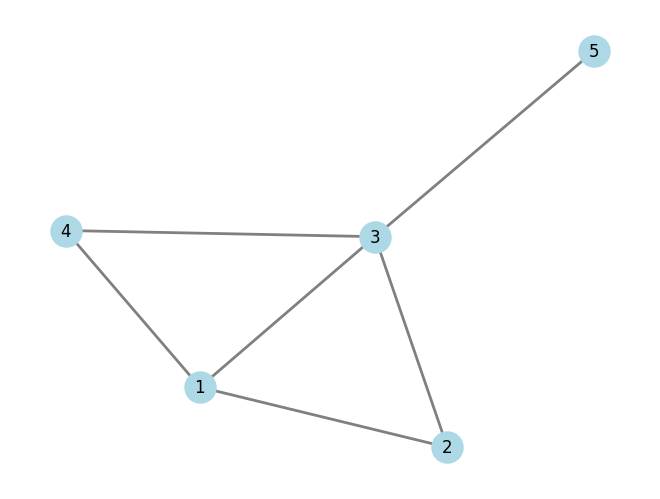

In [11]:
def draw_graph(edges):
    G = nx.Graph()
    G.add_edges_from(edges)

    nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, edge_color='grey', width=2.0)
    plt.show()

# Test 1:
edges = [(1, 2), (1, 3), (1, 4), (2, 3), (3, 5), (3, 4)]
draw_graph(edges)